In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_match = pd.read_csv('../data/match_data_from2009-to2015.csv',index_col=0)
df_match = df_match[df_match['HomePoint'] != '中止']
for clm in ['HomePoint','AwayPoint']:
    df_match[clm] = pd.to_numeric(df_match[clm])
df_match.head()

,HomeTeam,HomePoint,AwayTeam,AwayPoint,Studium,StartTime
Date,,,,,,
2009-04-03,中,4,横,1,ナゴヤドーム,18:00
2009-04-03,巨,3,広,6,東京ドーム,18:00
2009-04-03,阪,5,ヤ,2,京セラD大阪,18:00
2009-04-03,日,1,楽,3,札幌ドーム,18:00
2009-04-03,ソ,8,オ,0,ヤフードーム,18:00


In [3]:
df_match['HomePoint'].unique()

array([ 4,  3,  5,  1,  8,  2,  6, 10, 11,  9,  0, 13,  7, 15, 12, 16, 23,
       14, 19, 20, 22, 17, 18], dtype=int64)

In [4]:
gp = df_match.groupby('Studium')

In [5]:
sd_count = gp.count()['HomeTeam']
sd_count = count.sort_values(by='HomeTeam')[::-1]

NameError: name 'count' is not defined

In [6]:
sd_count

Studium
Kスタ宮城      134
QVCマリン     359
いわき          3
ひたちなか        2
ほっと神戸       73
コボスタ宮城     133
スカイマーク      44
ナゴヤドーム     477
マツダスタ      476
ヤフオクドーム    201
ヤフードーム     275
三次           4
京セラD大阪     458
京セラＤ大阪       7
京都           2
佐賀           1
倉敷           7
函館          10
前橋           6
北九州         13
千葉マリン      144
呉            5
大宮          19
宇部           1
宇都宮          5
宮崎           1
富山           9
尾道           4
山形           4
岐阜           8
          ... 
札幌円山         1
東京ド          2
東京ドーム      508
松山          17
松本           2
横浜         459
浜松           7
熊本           7
甲子園        429
甲府           4
皇子山          2
盛岡           7
相模原          3
神宮         463
福井           3
福山           1
福島           5
秋田          18
米子           4
西武ドーム      410
西武プリンス      69
豊橋           7
那覇          11
郡山          11
金沢           6
長崎           3
長野           9
静岡          10
鹿児島          6
Ｋスタ宮城      202
Name: HomeTeam, dtype: int64

In [7]:
min_games = 200
sd_count.StartTime
top10_st = sd_count.index[:10]

AttributeError: 'Series' object has no attribute 'StartTime'

In [8]:
gp_points = df_match.groupby(['AwayPoint','HomePoint'],as_index=False).	HomeTeam.count().rename(columns = {'HomeTeam':'count'})

In [9]:
max_point = max(gp_points[['HomePoint','AwayPoint']].max())
print(max_point)

23


In [19]:
gp_points['count'] = gp_points['count'].astype('int')

In [43]:
gp_points.dtypes

piv = gp_points.pivot('AwayPoint','HomePoint','count')

In [29]:
piv = piv.fillna(0).astype('int')

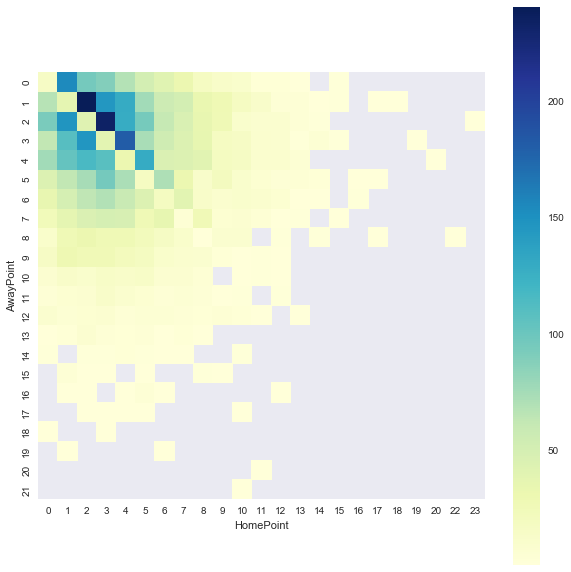

In [47]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(piv,annot=False,square=True,fmt='',cmap="YlGnBu",cbar=True)
plt.savefig('matchup_table.png',dpi=100)

In [49]:
df_match[df_match['HomePoint'] == 23]

,HomeTeam,HomePoint,AwayTeam,AwayPoint,Studium,StartTime
Date,,,,,,
2009-06-11,ロ,23,広,2,千葉マリン,18:15


In [23]:
piv

HomePoint,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,22,23
AwayPoint,,,,,,,,,,,,,,,,,,,,,
0,16.0,155.0,96.0,90.0,69.0,52.0,42.0,32.0,18.0,14.0,...,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68.0,38.0,241.0,146.0,130.0,76.0,57.0,52.0,33.0,29.0,...,4.0,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN
2,93.0,148.0,43.0,234.0,129.0,95.0,61.0,47.0,35.0,28.0,...,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,63.0,110.0,147.0,39.0,182.0,74.0,55.0,45.0,36.0,18.0,...,2.0,6.0,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,76.0,104.0,117.0,109.0,32.0,130.0,46.0,45.0,41.0,19.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
5,45.0,63.0,75.0,96.0,73.0,18.0,72.0,32.0,13.0,21.0,...,5.0,3.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
6,35.0,50.0,64.0,70.0,60.0,45.0,19.0,40.0,14.0,10.0,...,1.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
7,25.0,38.0,46.0,50.0,48.0,28.0,36.0,5.0,27.0,7.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,12.0,28.0,32.0,28.0,28.0,23.0,17.0,12.0,1.0,9.0,...,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN


In [61]:
point_hist = [[0] *24]*24

In [68]:
for i in range(0,max_point):
    for j in range(0,max_point):
        a =gp_points[(gp_points['AwayPoint'] == i ) & (gp_points['HomePoint'] == j )]['count']

In [69]:
a

Series([], Name: count, dtype: int64)

In [44]:
df_match.groupby(['Studium','HomePoint'],as_index=False).AwayPoint.count()

,Studium,HomePoint,AwayPoint
0,Kスタ宮城,0,7
1,Kスタ宮城,1,23
2,Kスタ宮城,2,20
3,Kスタ宮城,3,24
4,Kスタ宮城,4,16
5,Kスタ宮城,5,12
6,Kスタ宮城,6,8
7,Kスタ宮城,7,9
8,Kスタ宮城,8,6
9,Kスタ宮城,9,2
